In [ ]:
import pandas as pd
from textblob import TextBlob
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt
df = pd.read_csv('Najot_tal_analis.csv')

In [ ]:
df.info()

In [ ]:
def translate_to_english(text):
    try:
        translation = GoogleTranslator(source='auto', target='en').translate(text)
        return translation if translation else "Translation Error"
    except Exception as e:
        return "Translation Error"

df['Translated'] = df['text'].apply(translate_to_english)


In [4]:
def get_sentiment(text):
    if text == "Translation Error":
        return "Нейтральный"
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return 'Позитивный'
    elif blob.sentiment.polarity < 0:
        return 'Негативный'
    else:
        return 'Нейтральный'

df['Sentiment'] = df['Translated'].apply(get_sentiment)


In [5]:
df.head()

,id,username,owner_id,profile_pic_url,text,created_at,Translated,Sentiment
0,17853026919245029,najottalim,8735940933,https://instagram.ftas1-1.fna.fbcdn.net/v/t51....,Sizga shaxsiydan xabar qoldirdik 🚀,1727019953,We left you a private message 🚀,Нейтральный
1,17915866499994863,_bibisora_u,69202499922,https://instagram.ftas2-2.fna.fbcdn.net/v/t51....,+,1727171981,Translation Error,Нейтральный
2,18066441280626930,najottalim,8735940933,https://instagram.ftas1-1.fna.fbcdn.net/v/t51....,Sizga shaxsiydan xabar yubordik 😊,1727171991,We sent you a private message,Нейтральный
3,17948564834743703,bakhtiyor_779,61955297428,https://instagram.ftas1-1.fna.fbcdn.net/v/t51....,+,1727191712,Translation Error,Нейтральный
4,18044725117989805,najottalim,8735940933,https://instagram.ftas1-1.fna.fbcdn.net/v/t51....,Sizga shaxsiydan javob berdik ✅,1727191723,We have answered you personally,Нейтральный


In [12]:
df['Sentiment'].value_counts()


Sentiment
Нейтральный    234
Позитивный       2
Name: count, dtype: int64

<Axes: xlabel='Sentiment'>

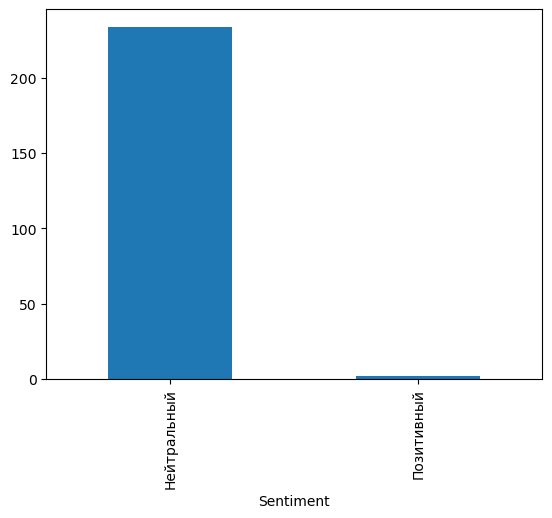

In [28]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar')

In [20]:
# labels = sentiment_counts.index
# sizes = sentiment_counts.values
# colors = ['#ff9999','#66b3ff','#99ff99']
# explode = (0.1, 0, 0)
# plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
#         shadow=True, startangle=140)
# plt.axis('equal')
# plt.title('Процентное соотношение сентиментов')
# plt.show()
# import matplotlib.pyplot as plt


# abels = sentiment_counts.index
# sizes = sentiment_counts.values
# colors = ['#ff9999','#66b3ff','#99ff99']
# explode = (0.1, 0, 0)  
# plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
#             hadow=True, startangle=140)
# plt.axis('equal')
# plt.title('Процентное соотношение сентиментов')
# plt.show()